In [28]:
!pip install spacy
!pip install transformers
!pip install torch  # Needed for transformers
!python -m spacy download en_core_web_sm  # Small Spacy model for English language

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 35.9 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [29]:
import pandas as pd

# Load the data
data = pd.read_csv('google_reviews.csv')

# Handle missing values in the 'description' column
data['description'] = data['description'].fillna('')
print("Initial Data Sample:")
print(data[['description']].head(), "\n")  # Print initial sample


Initial Data Sample:
                                         description
0  I have invited a 3 friends for the dinner.\nTh...
1  Pleased to see a Mangalorean restaurant finall...
2  Good service.   Fish a bit too spicy and lassi...
3  Nothing quite satisfies your taste buds like a...
4  My uncle called me up, excited to tell me abou... 



In [30]:
!pip install nltk

In [31]:
import nltk

# Download NLTK data
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')
nltk.download('wordnet')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [32]:
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

# Initialize stop words and lemmatizer
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

# Function to preprocess text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # Remove non-alphabetic characters
    tokens = word_tokenize(text)  # Tokenization
    processed_tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]  # Remove stopwords and lemmatize
    return ' '.join(processed_tokens)

# Apply preprocessing
data['cleaned_description'] = data['description'].apply(preprocess_text)
print("Data after Cleaning and Tokenization:")
print(data[['description', 'cleaned_description']].head(), "\n")  # Print cleaned sample


Data after Cleaning and Tokenization:
                                         description  \
0  I have invited a 3 friends for the dinner.\nTh...   
1  Pleased to see a Mangalorean restaurant finall...   
2  Good service.   Fish a bit too spicy and lassi...   
3  Nothing quite satisfies your taste buds like a...   
4  My uncle called me up, excited to tell me abou...   

                                 cleaned_description  
0  invited friend dinner service fantastic food t...  
1  pleased see mangalorean restaurant finally ope...  
2  good service fish bit spicy lassi sweet probab...  
3  nothing quite satisfies taste bud like authent...  
4  uncle called excited tell mangalorean place si...   



In [33]:
from datetime import datetime, timedelta

# Function to convert relative dates to actual dates
def convert_relative_date(relative_date):
    if 'a month ago' in relative_date:
        return datetime.now() - timedelta(days=30)
    elif 'months ago' in relative_date:
        months_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=months_ago * 30)
    elif 'a week ago' in relative_date:
        return datetime.now() - timedelta(weeks=1)
    elif 'weeks ago' in relative_date:
        weeks_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(weeks=weeks_ago)
    elif 'a day ago' in relative_date:
        return datetime.now() - timedelta(days=1)
    elif 'days ago' in relative_date:
        days_ago = int(relative_date.split()[0])
        return datetime.now() - timedelta(days=days_ago)
    else:
        return None  # Handle other cases as necessary


In [34]:
# Convert date column
data['date'] = data['date'].apply(convert_relative_date)
print("Converted Dates Sample:")
print(data[['date']].head(), "\n")  # Print converted dates sample


Converted Dates Sample:
                        date
0 2024-10-22 10:12:02.423057
1 2024-06-24 10:12:02.423085
2 2024-10-22 10:12:02.423088
3 2024-05-25 10:12:02.423092
4 2024-04-25 10:12:02.423096 



In [35]:
print(data)

                                                  link  rating  \
0    https://www.google.com/maps/reviews/data=!4m8!...     5.0   
1    https://www.google.com/maps/reviews/data=!4m8!...     4.0   
2    https://www.google.com/maps/reviews/data=!4m8!...     4.0   
3    https://www.google.com/maps/reviews/data=!4m8!...     5.0   
4    https://www.google.com/maps/reviews/data=!4m8!...     5.0   
..                                                 ...     ...   
490  https://www.google.com/maps/reviews/data=!4m8!...     4.0   
491  https://www.google.com/maps/reviews/data=!4m8!...     5.0   
492  https://www.google.com/maps/reviews/data=!4m8!...     4.0   
493  https://www.google.com/maps/reviews/data=!4m8!...     3.0   
494  https://www.google.com/maps/reviews/data=!4m8!...     4.0   

                          date          user_name  \
0   2024-10-22 10:12:02.423057     Kok Jacqueline   
1   2024-06-24 10:12:02.423085       Supreet Kini   
2   2024-10-22 10:12:02.423088         Robin CHA

In [36]:
import spacy
from transformers import pipeline

# Load the SpaCy English tokenizer
nlp = spacy.load("en_core_web_sm")

In [37]:
# Load pre-trained sentiment analysis model
sentiment_pipeline = pipeline("sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


In [38]:
# Aspect keywords mapping
aspect_keywords = {
    'Food': ['food', 'meal', 'cuisine', 'dish', 'menu', 'taste', 'flavor', 'biryani','mangalorean food','chicken', 'fish', 'vegetable','mutton','rice','naan','ghee roast','indian food','seafood','drinks'],
    'Service': ['service', 'staff', 'waiter', 'server', 'host', 'speed', 'efficiency', 'waiting', 'response'],
    'Ambiance': ['ambiance', 'environment', 'decor', 'atmosphere', 'setting', 'space'],
    'Price': ['price', 'cost', 'value', 'money', 'expensive', 'cheap', 'affordable'],
    'Location': ['location', 'place', 'area', 'spot', 'accessibility','parking'],
    'Menu': ['menu', 'options', 'variety', 'selection', 'choices'],
    'Hygiene': ['cleanliness', 'hygiene', 'clean', 'sanitary', 'restroom', 'bathroom']
}

# Function to assign sentences to aspects based on keywords
def map_sentence_to_aspect(sentence):
    doc = nlp(sentence.lower())
    aspects_found = {}
    for token in doc:
        for aspect, keywords in aspect_keywords.items():
            if token.text in keywords:
                if aspect in aspects_found:
                    aspects_found[aspect].append(sentence)
                else:
                    aspects_found[aspect] = [sentence]
    return aspects_found


In [39]:
def analyze_aspect_sentiments(df, column_name):
    aspect_sentiment_results = {}
    for index, row in df.iterrows():
        text = row[column_name]
        mapped_aspects = map_sentence_to_aspect(text)
        for aspect, sentences in mapped_aspects.items():
            if aspect not in aspect_sentiment_results:
                aspect_sentiment_results[aspect] = []
            for sentence in sentences:
                sentiment_result = sentiment_pipeline(sentence)[0]
                aspect_sentiment_results[aspect].append(sentiment_result)
    return aspect_sentiment_results

In [40]:
# Apply the sentiment analysis
sentiments = analyze_aspect_sentiments(data, 'cleaned_description')
print(sentiments)

{'Service': [{'label': 'POSITIVE', 'score': 0.9972248077392578}, {'label': 'NEGATIVE', 'score': 0.9755388498306274}, {'label': 'POSITIVE', 'score': 0.9943171143531799}, {'label': 'POSITIVE', 'score': 0.992098331451416}, {'label': 'POSITIVE', 'score': 0.992098331451416}, {'label': 'POSITIVE', 'score': 0.9251486659049988}, {'label': 'POSITIVE', 'score': 0.9251486659049988}, {'label': 'POSITIVE', 'score': 0.9977685213088989}, {'label': 'NEGATIVE', 'score': 0.9936349391937256}, {'label': 'NEGATIVE', 'score': 0.9936349391937256}, {'label': 'NEGATIVE', 'score': 0.8436170220375061}, {'label': 'POSITIVE', 'score': 0.9732640981674194}, {'label': 'NEGATIVE', 'score': 0.9966210126876831}, {'label': 'NEGATIVE', 'score': 0.979706346988678}, {'label': 'NEGATIVE', 'score': 0.979706346988678}, {'label': 'POSITIVE', 'score': 0.9967048764228821}, {'label': 'POSITIVE', 'score': 0.9967048764228821}, {'label': 'POSITIVE', 'score': 0.9984232187271118}, {'label': 'POSITIVE', 'score': 0.9984232187271118}, {'l

In [41]:
# Convert sentiment data into a DataFrame with ratios
sen_data = []
for aspect, results in sentiments.items():
    total = len(results)
    positive_count = sum(1 for result in results if result['label'] == 'POSITIVE')
    negative_count = sum(1 for result in results if result['label'] == 'NEGATIVE')
    positive_ratio = positive_count / total  # Ratio of positive sentiments
    negative_ratio = negative_count / total  # Ratio of negative sentiments
    sen_data.append({'Aspect': aspect, 'Positive': positive_ratio, 'Negative': negative_ratio})

sentiment_df = pd.DataFrame(sen_data)
sentiment_df.set_index('Aspect', inplace=True)
print(sentiment_df)


          Positive  Negative
Aspect                      
Service   0.764045  0.235955
Food      0.653117  0.346883
Price     0.766667  0.233333
Location  0.895349  0.104651
Hygiene   0.400000  0.600000
Ambiance  0.937500  0.062500
Menu      0.800000  0.200000


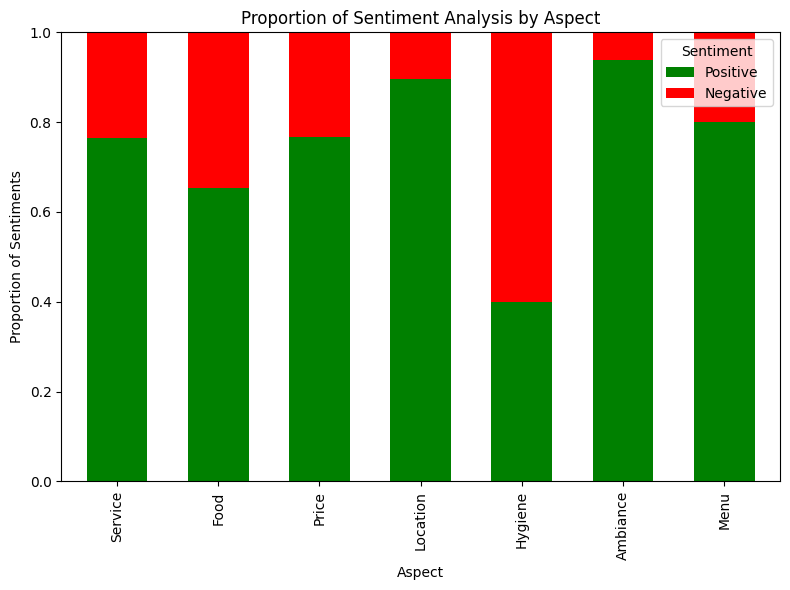

In [42]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
sentiment_df.plot(kind='bar', stacked=True, color=['green', 'red'], width=0.6, ax=ax)

# Labels and titles
plt.title('Proportion of Sentiment Analysis by Aspect')
plt.xlabel('Aspect')
plt.ylabel('Proportion of Sentiments')
plt.ylim(0, 1)  # Ensure the y-axis goes from 0 to 1 for proportion visualization
plt.legend(title='Sentiment', labels=['Positive', 'Negative'])

plt.tight_layout()
plt.show()


<ipython-input-43-e5c020ca67fe>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-43-e5c020ca67fe>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-43-e5c020ca67fe>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-43-e5c020ca67fe>:14: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)
<ipython-input-43-e5c020ca67fe>:14: UserWarning: set_ticklabels() should only be used with a fixed numbe

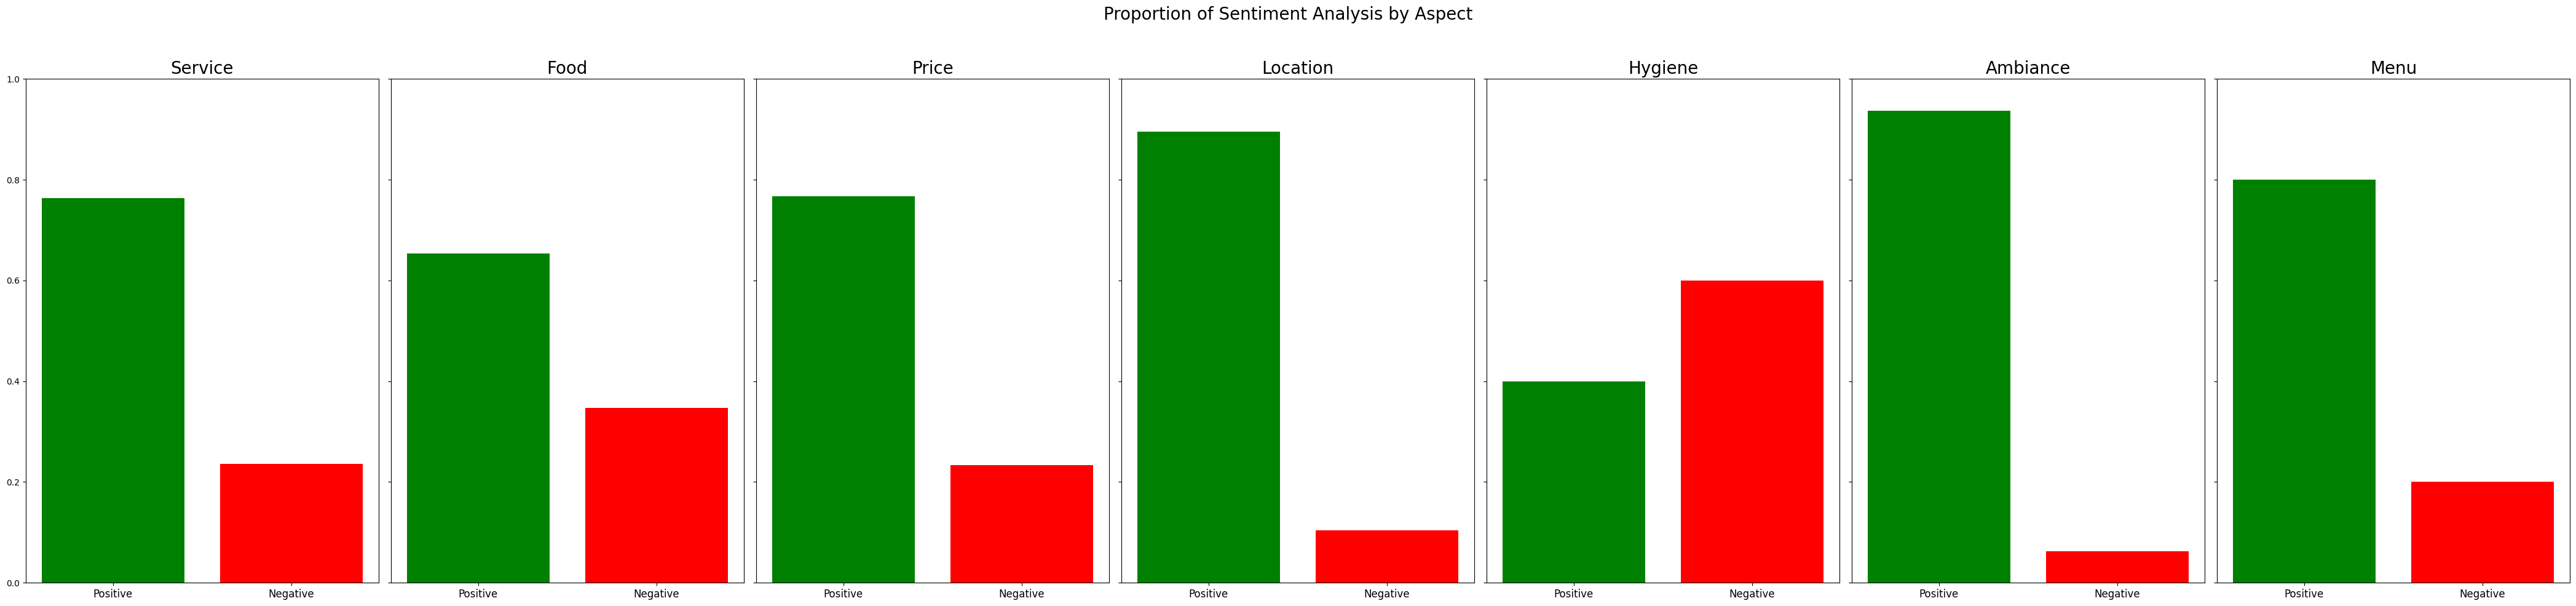

In [43]:
num_aspects = len(sentiment_df)

fig_width = num_aspects * 6
fig_height = 10

# Create a figure with subplots
fig, axes = plt.subplots(nrows=1, ncols=num_aspects, figsize=(fig_width, fig_height), sharey=True)

# Plot data on each subplot
for ax, (aspect, row) in zip(axes, sentiment_df.iterrows()):
    ax.bar(['Positive', 'Negative'], row, color=['green', 'red'])
    ax.set_title(aspect, fontsize=20)
    ax.set_ylim(0, 1)  # Ensure y-axis goes from 0 to 1
    ax.set_xticklabels(['Positive', 'Negative'], fontsize=12)

plt.suptitle('Proportion of Sentiment Analysis by Aspect', fontsize=20)

plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

,Word,Sentence,Sentiment,Score
0,clean,pleased see mangalorean restaurant finally ope...,NEGATIVE,0.975539
1,bathroom,food quite awful nothing like manglorean food ...,NEGATIVE,0.998694
2,clean,food reasonably priced taste satisfactory serv...,POSITIVE,0.518307
3,clean,taste good love restaurant bright clean friendly,POSITIVE,0.999844
4,cleanliness,cleanliness ambience need improvement,NEGATIVE,0.951366


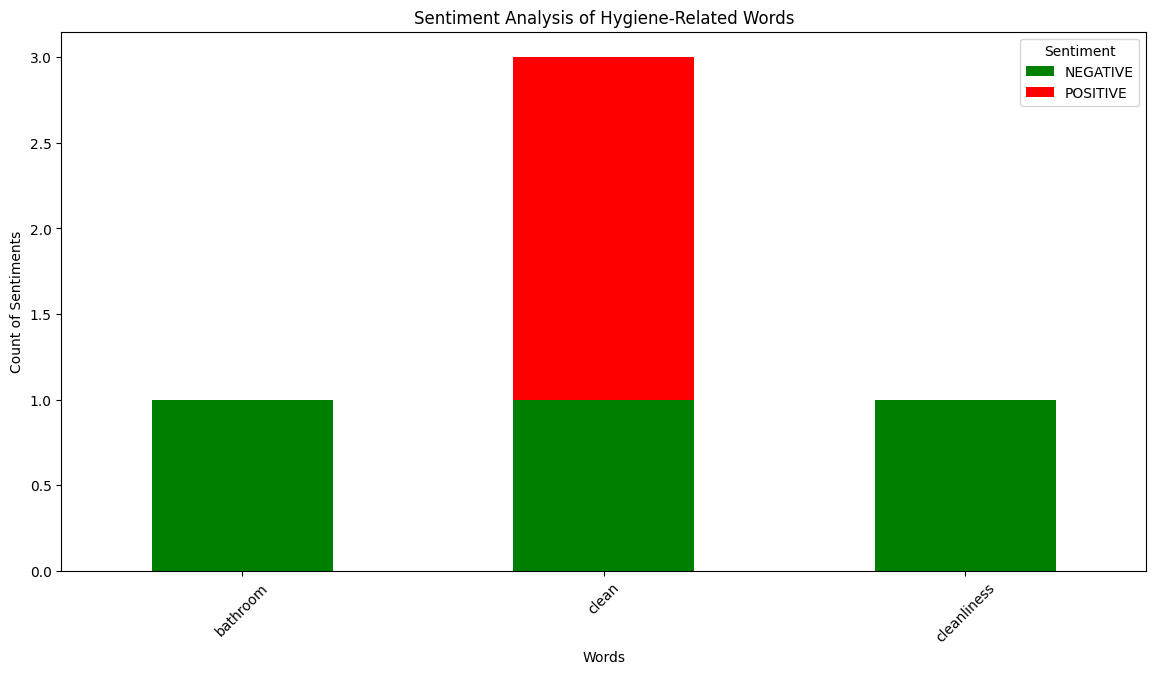

In [44]:
# Hygiene keywords for analysis
hygiene_keywords = ['cleanliness', 'hygiene', 'clean', 'sanitary', 'restroom', 'bathroom']

#Extract sentences related to the 'Hygiene' aspect and apply sentiment analysis
hygiene_aspect_sentiments = []

for index, row in data.iterrows():
    text = row['cleaned_description']
    mapped_aspects = map_sentence_to_aspect(text)
    if 'Hygiene' in mapped_aspects:
        for sentence in mapped_aspects['Hygiene']:
            # Apply sentiment analysis to the sentence
            sentiment_result = sentiment_pipeline(sentence)[0]

            # Split the sentence into words and map each word if it's related to 'Hygiene'
            words_in_sentence = sentence.lower().split()
            for word in words_in_sentence:
                if word in hygiene_keywords:
                    hygiene_aspect_sentiments.append({
                        'Word': word,
                        'Sentence': sentence,
                        'Sentiment': sentiment_result['label'],
                        'Score': sentiment_result['score']
                    })

# Display the DataFrame with hygiene-related sentiment analysis
hygiene_sentiment_df = pd.DataFrame(hygiene_aspect_sentiments)
display(hygiene_sentiment_df)

# Count the number of positive and negative labels for each hygiene-related word
hygiene_word_counts = hygiene_sentiment_df.groupby(['Word', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
hygiene_word_counts.plot(kind='bar', stacked=True, figsize=(14, 7), color=['green', 'red'])
plt.title('Sentiment Analysis of Hygiene-Related Words')
plt.xlabel('Words')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)
plt.show()

-----Comments Regarding Food------


,Word,Sentence,Sentiment,Score
0,food,invited friend dinner service fantastic food t...,POSITIVE,0.997225
1,taste,invited friend dinner service fantastic food t...,POSITIVE,0.997225
2,food,invited friend dinner service fantastic food t...,POSITIVE,0.997225
3,taste,invited friend dinner service fantastic food t...,POSITIVE,0.997225
4,chicken,pleased see mangalorean restaurant finally ope...,NEGATIVE,0.975539
...,...,...,...,...
2018,taste,good taste,POSITIVE,0.999846
2019,taste,good taste hygienic briyani wahooosuper,POSITIVE,0.998233
2020,mutton,hardcore fan kili parotta mutton dum briyani,NEGATIVE,0.991488
2021,food,authentic punjabi food ghar ka khana,POSITIVE,0.999370


-----Negative Comments Regarding Food------


,Word,Sentiment,Score
0,chicken,NEGATIVE,0.975539
1,fish,NEGATIVE,0.975539
2,chicken,NEGATIVE,0.975539
3,chicken,NEGATIVE,0.975539
4,chicken,NEGATIVE,0.975539
...,...,...,...
1323,food,NEGATIVE,0.993649
1324,food,NEGATIVE,0.999428
1325,mutton,NEGATIVE,0.996619
1326,food,NEGATIVE,0.842619


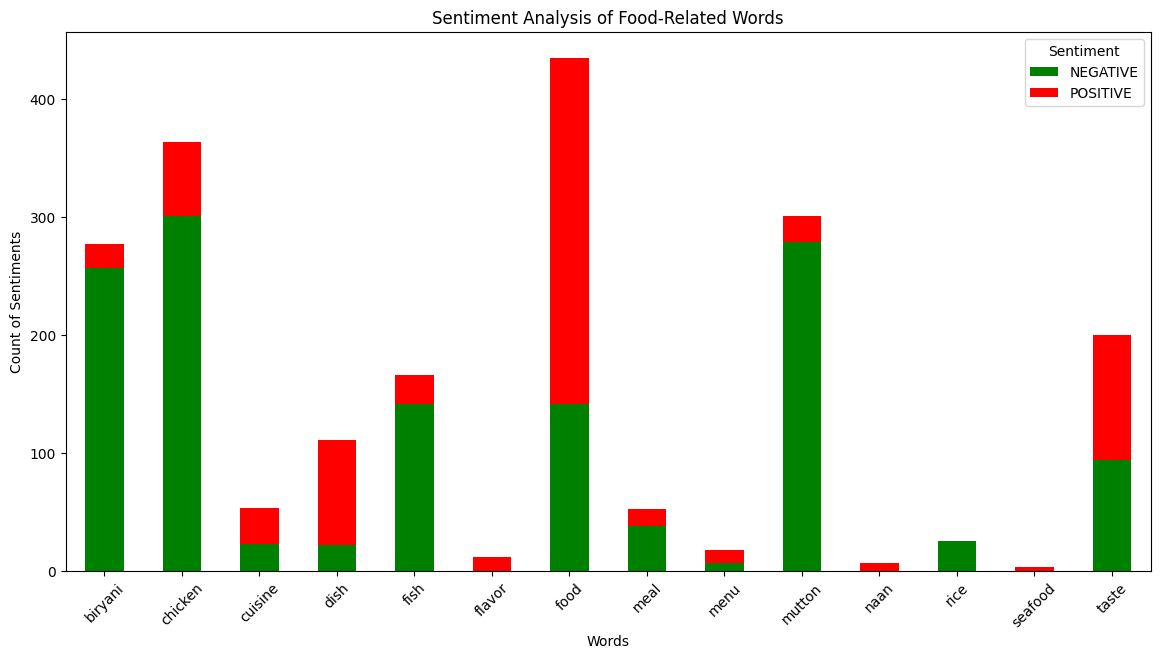

In [46]:
# Food keywords for analysis
food_keywords = ['food', 'meal', 'cuisine', 'dish', 'menu', 'taste', 'flavor', 'biryani', 'mangalorean food', 'chicken',
                 'fish', 'vegetable', 'mutton', 'rice', 'naan', 'ghee roast', 'indian food', 'seafood', 'drinks']

# Extract sentences related to the 'Food' aspect and apply sentiment analysis
food_aspect_sentiments = []
negative_food_comments = []  # To store only negative comments about food

for index, row in data.iterrows():
    text = row['cleaned_description']
    mapped_aspects = map_sentence_to_aspect(text)
    if 'Food' in mapped_aspects:
        for sentence in mapped_aspects['Food']:
            # Apply sentiment analysis to the sentence
            sentiment_result = sentiment_pipeline(sentence)[0]

            # Split the sentence into words and map each word if it's related to 'Food'
            words_in_sentence = sentence.lower().split()
            for word in words_in_sentence:
                if word in food_keywords:
                    food_aspect_sentiments.append({
                        'Word': word,
                        'Sentence': sentence,
                        'Sentiment': sentiment_result['label'],
                        'Score': sentiment_result['score']
                    })

                    # Add to negative food comments if sentiment is negative
                    if sentiment_result['label'] == 'NEGATIVE':
                        negative_food_comments.append({
                            'Word': word,
                            'Sentiment': sentiment_result['label'],
                            'Score': sentiment_result['score']
                        })
print("-----Comments Regarding Food------")
food_sentiment_df = pd.DataFrame(food_aspect_sentiments)
display(food_sentiment_df)

print("-----Negative Comments Regarding Food------")
# Display the DataFrame with only negative food-related comments
negative_food_df = pd.DataFrame(negative_food_comments)
display(negative_food_df)

# Count the number of positive and negative labels for each food-related word
food_word_counts = food_sentiment_df.groupby(['Word', 'Sentiment']).size().unstack(fill_value=0)

# Plotting
import matplotlib.pyplot as plt

food_word_counts.plot(kind='bar', stacked=True, figsize=(14, 7), color=['green', 'red'])
plt.title('Sentiment Analysis of Food-Related Words')
plt.xlabel('Words')
plt.ylabel('Count of Sentiments')
plt.xticks(rotation=45)
plt.show()
